In [1]:
import numpy as np

N = 8
Adj = np.zeros((N, N))

# 정점 번호 규칙
# 0~4  : Left  정점 (L0~L4)
# 5~11 : Right 정점 (R0~R6)

# 간선 입력 (당신이 준 그래프 그대로)
Adj[0, 6] = 1   # L0 → R1 (6번)
Adj[1, 5] = 1   # L1 → R0 (5번)
Adj[1, 7] = 1   # L1 → R2 (7번)
Adj[2, 6] = 1   # L2 → R1 (6번)

# # 무방향 그래프니까 반대 방향도 추가 (이원 그래프는 무방향이 표준)
Adj[6, 0] = 1   # R1 → L0
Adj[5, 1] = 1   # R0 → L1
Adj[7, 1] = 1   # R2 → L1
Adj[6, 2] = 1   # R1 → L2

print("최종 인접행렬 (12×12):")
print(Adj.astype(int))

최종 인접행렬 (12×12):
[[0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


In [2]:
# 길이 k인 경로 수 = Adj^k 의 (i,j) 원소
k = 2
paths = np.linalg.matrix_power(Adj, k)

print(paths.astype(int))

# 예: L1 → L1 로 가는 길이 4 경로 수
print("L1 → L1 (길이 4):", int(paths[1,1]))   # → 4

# 예: L0 → R2 로 가는 길이 5 경로 수
print("L0 → R2 (길이 5):", int(paths[0,2]))   # → 4

# 예: R1 → R1 로 가는 길이 6 경로 수
print("R1 → R1 (길이 6):", int(paths[6,6]))   # → 8

[[1 0 1 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0 1]]
L1 → L1 (길이 4): 2
L0 → R2 (길이 5): 1
R1 → R1 (길이 6): 2


### 선형대수 + 컴공

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

N, M = 5, 4

grid = np.zeros((N, M))

def bfs(grid, sx, sy, tx, ty):
    visited = [False] * N
    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]

    grid[sx, sy] = 1
    queue = deque([(sx, sy)])
    visited = set([(sx, sy)])

    while queue:
        x, y = queue.popleft()

        if x == tx and y == ty:
            return grid[x, y]

        for i in range(4):
            nx, ny = x + dx[i], y + dy[i]
            if nx >= 0 and nx <= N and ny >= 0 or ny <= M:
                print(nx, ny)
                visited.add((nx, ny))
                queue.append((nx, ny))

    return None


print(grid)
result = bfs(grid, 0, 0, 1, 0)
print(result)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
-1 0
1 0
0 -1
0 1
-2 0
0 0
-1 -1
-1 1
0.0


From (0,0) to (3,2)
Shortest distance: 5
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2)]
Path steps: 5


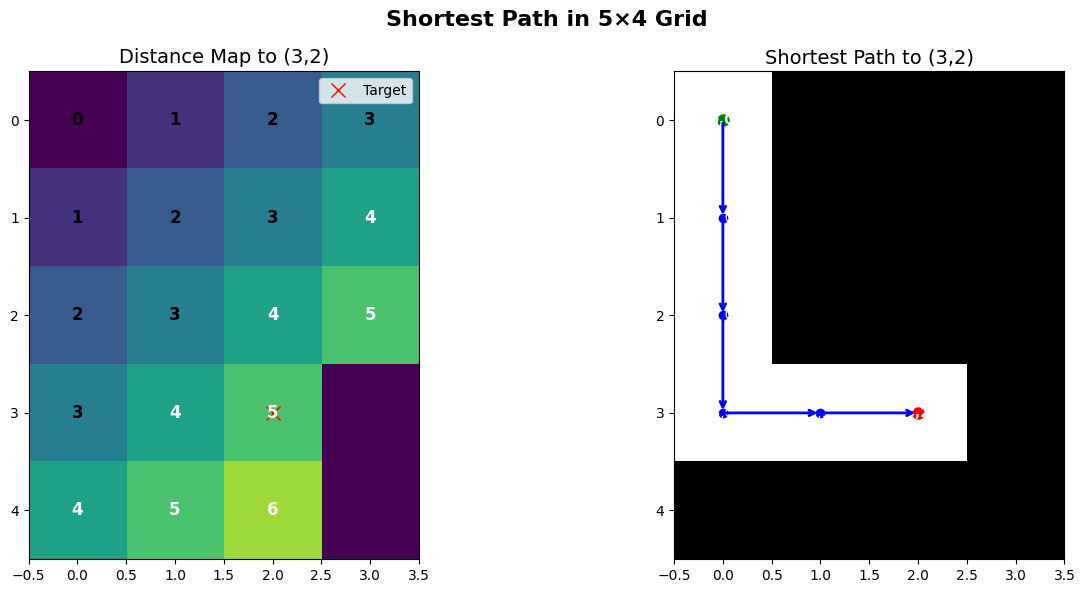


Step-by-step:
Step 0: (0, 0)
Step 1: (1, 0)
Step 2: (2, 0)
Step 3: (3, 0)
Step 4: (3, 1)
Step 5: (3, 2)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Grid: 5x4
N, M = 5, 4

# 목표점 설정 (예: (3,2)로 가자 – 자유롭게 바꾸세요)
target_i, target_j = 3, 2

# BFS로 거리 + 경로 찾기
def bfs_with_path(start_i=0, start_j=0, target_i=3, target_j=2):

    # 거리: numpy array
    dist = np.full((N, M), -1)

    # 부모: list of lists (튜플 저장 위해)
    parent = [[(-1, -1) for _ in range(M)] for _ in range(N)]

    q = deque([(start_i, start_j)])
    dist[start_i, start_j] = 0

    while q:
        x, y = q.popleft()

        if (x, y) == (target_i, target_j):
            break

        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < N and 0 <= ny < M and dist[nx, ny] == -1:
                dist[nx, ny] = dist[x, y] + 1
                parent[nx][ny] = (x, y)  # 부모 기록
                q.append((nx, ny))

    # 목표점까지 경로 복원
    path = []
    current = (target_i, target_j)
    while current != (-1, -1):
        path.append(current)
        current = parent[current[0]][current[1]]

    path.reverse()  # 시작점부터 순서로
    return dist, parent, path

# 실행
dist, parent, path = bfs_with_path(0, 0, target_i, target_j)

print(f"From (0,0) to ({target_i},{target_j})")
print(f"Shortest distance: {dist[target_i, target_j]}")
print(f"Path: {path}")
print(f"Path steps: {len(path) - 1}")

# 경로 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. 전체 거리 맵
im1 = ax1.imshow(dist, cmap='viridis', vmin=0, vmax=7)
ax1.set_title(f"Distance Map to ({target_i},{target_j})", fontsize=14)
for i in range(N):
    for j in range(M):
        if dist[i,j] != -1:
            ax1.text(j, i, str(int(dist[i,j])), ha='center', va='center',
                     color='white' if dist[i,j] > 3 else 'black', fontsize=12, weight='bold')
ax1.plot(target_j, target_i, 'rx', markersize=10, label='Target')
ax1.legend()

# 2. 경로 강조한 그리드
grid_display = np.zeros((N, M))
for i, j in path:
    grid_display[i, j] = 1  # 경로 = 1

im2 = ax2.imshow(grid_display, cmap='gray', vmin=0, vmax=1)
ax2.set_title(f"Shortest Path to ({target_i},{target_j})", fontsize=14)

# 경로 점들 표시
for step, (x, y) in enumerate(path):
    color = 'green' if step == 0 else 'red' if step == len(path)-1 else 'blue'
    ax2.plot(y, x, 'o', color=color, markersize=8 if step in [0, len(path)-1] else 6)
    ax2.text(y, x, f'({x},{y})', ha='center', va='center', fontsize=10,
             color='white', weight='bold' if step in [0, len(path)-1] else 'normal')

# 화살표로 이동 방향
for k in range(len(path)-1):
    x1, y1 = path[k]
    x2, y2 = path[k+1]
    ax2.annotate('', xy=(y2, x2), xytext=(y1, x1),
                 arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

plt.suptitle("Shortest Path in 5×4 Grid", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 단계별 경로 출력
print("\nStep-by-step:")
for step, (i, j) in enumerate(path):
    print(f"Step {step}: ({i}, {j})")

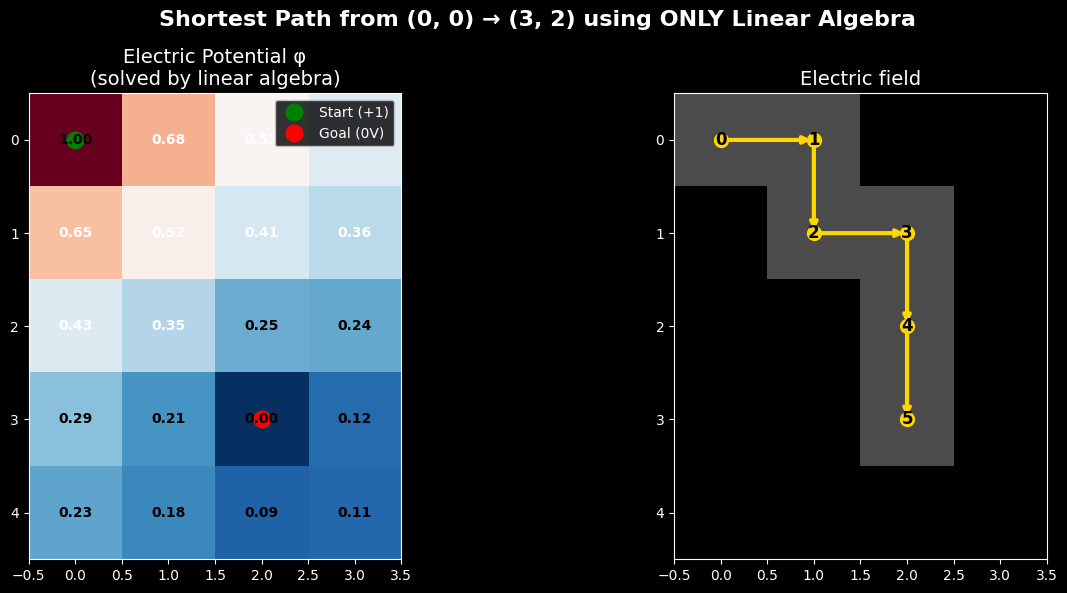

Path found by linear algebra: [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2)]
Length: 5 steps


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 격자 설정
N, M = 5, 4
V = N * M
def idx(i, j): return i * M + j

# 시작점과 목표점
start = (0, 0)
goal  = (3, 2)        # 원하는 아무 점으로 바꾸세요!

s = idx(*start)
g = idx(*goal)

# 인접 행렬 A와 라플라시안 L 만들기
A = np.zeros((V, V))
for i in range(N):
    for j in range(M):
        u = idx(i,j)
        for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
            ni,nj = i+di, j+dj
            if 0 <= ni < N  and 0 <= nj < M:
                A[u, idx(ni,nj)] = 1

L = np.diag(A.sum(axis=1)) - A   # 그래프 라플라시안

# 전류 주입: 시작점 +1, 목표점 -1
b = np.zeros(V)
b[s] =  1
b[g] = -1

# 시작점과 목표점을 고정 (pinned) → 전위 1과 0으로 고정
L_pinned = L.copy().astype(float)
b_pinned = b.copy()

L_pinned[s] = 0; L_pinned[s, s] = 1; b_pinned[s] = 1   # φ(start) = 1
L_pinned[g] = 0; L_pinned[g, g] = 1; b_pinned[g] = 0   # φ(goal) = 0

# 전위(voltage) 풀기
phi = np.linalg.solve(L_pinned, b_pinned)
phi = phi.reshape(N, M)

# 전기장(gradient) 계산 → 다음으로 갈 방향 결정
path = [goal]
current = goal
while current != start:
    i, j = current
    best = None
    best_val = -1e9

    for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
        ni,nj = i+di, j+dj
        if 0 <= ni < N and 0 <= nj < M:
            neighbor_val = phi[ni,nj]
            if neighbor_val > best_val:        # 전위가 더 높은 쪽으로 이동!
                best_val = neighbor_val
                best = (ni,nj)

    path.append(best)
    current = best

path.reverse()

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. 전위(voltage) 맵
im1 = ax1.imshow(phi, cmap='RdBu_r', vmin=0, vmax=1)
ax1.set_title("Electric Potential φ\n(solved by linear algebra)", fontsize=14)
for i in range(N):
    for j in range(M):
        ax1.text(j, i, f'{phi[i,j]:.2f}', ha='center', va='center',
                 color='white' if 0.3 < phi[i,j] < 0.7 else 'black', weight='bold')
ax1.plot(start[1], start[0], 'go', markersize=12, label='Start (+1)')
ax1.plot(goal[1],  goal[0],  'ro', markersize=12, label='Goal (0V)')
ax1.legend()

# 2. 추출된 최단 경로
grid = np.zeros((N,M))
for i,j in path:
    grid[i,j] = 1

ax2.imshow(grid, cmap='gray', alpha=0.3)
ax2.set_title("Electric field", fontsize=14)

# 경로 그리기
for k in range(len(path)-1):
    x1,y1 = path[k]
    x2,y2 = path[k+1]
    ax2.annotate('', xy=(y2,x2), xytext=(y1,x1),
                 arrowprops=dict(arrowstyle='->', lw=3, color='gold'))

for i, (x,y) in enumerate(path):
    ax2.plot(y, x, 'o', color='gold', markersize=10)
    ax2.text(y, x, str(i), ha='center', va='center', color='black', weight='bold', fontsize=12)

plt.suptitle(f"Shortest Path from {start} → {goal} using ONLY Linear Algebra",
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Path found by linear algebra:", path)
print("Length:", len(path)-1, "steps")

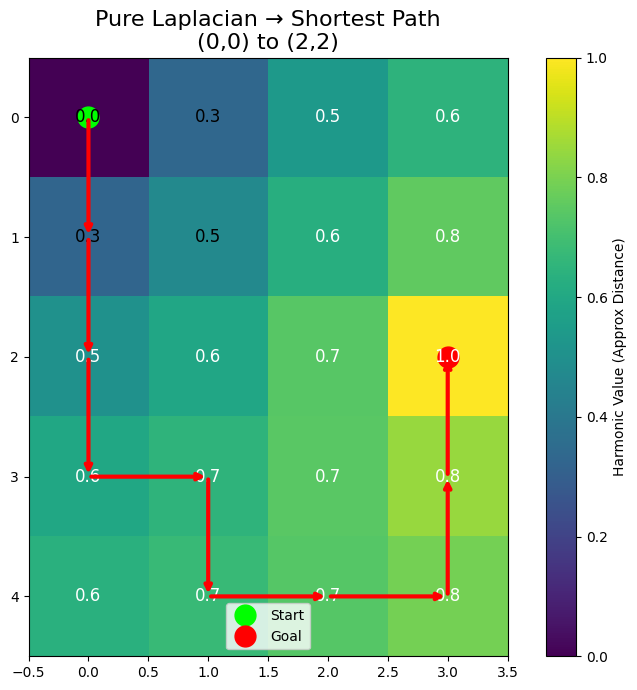

Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (4, 3), (3, 3), (2, 3)]
Length: 9
Note: The values are floating-point approximations, so path follows steepest descent/ascent rather than strict +1 steps.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
N, M = 5, 4
V = N * M
def idx(i,j): return i*M + j

# Start and goal (based on your image: start (0,0), goal (2,2))
start = (0, 0)
goal = (2, 3)

s = idx(*start)
g = idx(*goal)

# Build Laplacian L
L = np.zeros((V, V))
for i in range(N):
    for j in range(M):
        u = idx(i,j)
        deg = 0
        for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
            ni,nj = i+di, j+dj
            if 0 <= ni < N and 0 <= nj < M:
                L[u, idx(ni,nj)] = -1
                deg += 1
        L[u,u] = deg

# Pin start to 0, goal to 1 (arbitrary scale; harmonic function is scale-invariant for path)
L_fix = L.copy().astype(float)
b = np.zeros(V)
L_fix[s] = 0; L_fix[s,s] = 1; b[s] = 0
L_fix[g] = 0; L_fix[g,g] = 1; b[g] = 1

# Solve L d = b
d = np.linalg.solve(L_fix, b).reshape(N, M)

# Extract path: greedy ascent from goal to start (highest neighbor value)
path = [goal]
current = goal
visited = set([tuple(goal)])  # Prevent loops

while current != start and len(visited) < V:
    i, j = current
    best_val = -np.inf
    best = None
    for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
        ni,nj = i+di, j+dj
        if 0 <= ni < N and 0 <= nj < M and (ni,nj) not in visited:
            if d[ni,nj] < d[i,j]:  # Ascent toward lower values? Wait, direction depends on pinning
                if d[ni,nj] > best_val:  # Wait, since start=0, goal=1, move to lower to go to start
                    best_val = d[ni,nj]
                    best = (ni,nj)
    if best is None:
        break
    path.append(best)
    current = best
    visited.add(tuple(best))

path.reverse()

# Visualization (to match your image style)
fig, ax = plt.subplots(figsize=(8,7))
im = ax.imshow(d, cmap='viridis', origin='upper')
fig.colorbar(im, ax=ax, label='Harmonic Value (Approx Distance)')

for i in range(N):
    for j in range(M):
        ax.text(j, i, f'{d[i,j]:.1f}', ha='center', va='center', color='white' if d[i,j]>0.5 else 'black', fontsize=12)

# Path arrows
for k in range(len(path)-1):
    x1,y1 = path[k]
    x2,y2 = path[k+1]
    ax.annotate('', xy=(y2,x2), xytext=(y1,x1), arrowprops=dict(arrowstyle='->', lw=3, color='red'))

ax.plot(start[1], start[0], 'o', color='lime', markersize=15, label='Start')
ax.plot(goal[1], goal[0], 'o', color='red', markersize=15, label='Goal')
ax.set_title('Pure Laplacian → Shortest Path\n(0,0) to (2,2)', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()

print("Path found:", path)
print("Length:", len(path)-1)
print("Note: The values are floating-point approximations, so path follows steepest descent/ascent rather than strict +1 steps.")

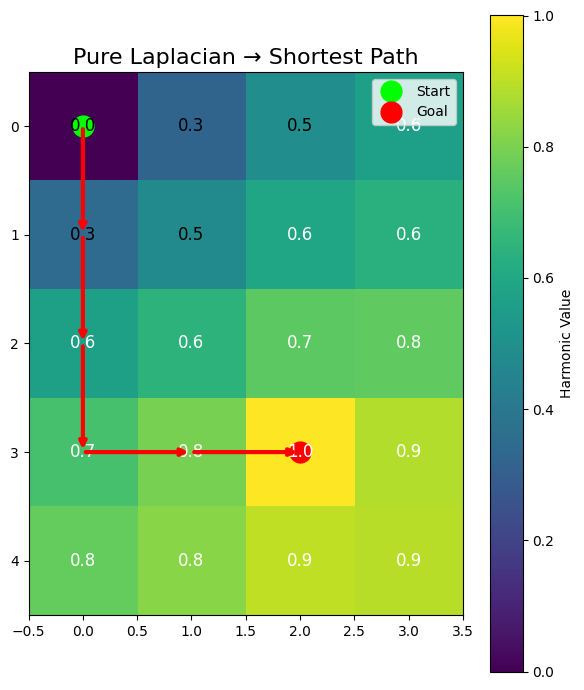

Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2)]
Length: 5


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
N, M = 5, 4
V = N * M
def idx(i,j): return i*M + j

# Start and goal (from your image)
start = (0, 0)
goal = (3, 2)

s = idx(*start)
g = idx(*goal)

# Build Laplacian L
L = np.zeros((V, V))
for i in range(N):
    for j in range(M):
        u = idx(i,j)
        deg = 0
        for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
            ni,nj = i+di, j+dj
            if 0 <= ni < N and 0 <= nj < M:
                L[u, idx(ni,nj)] = -1
                deg += 1
        L[u,u] = deg

# Pin start to 0, goal to 1 (scale doesn't matter for path)
L_fix = L.copy().astype(float)
b = np.zeros(V)
L_fix[s] = 0; L_fix[s,s] = 1; b[s] = 0
L_fix[g] = 0; L_fix[g,g] = 1; b[g] = 1

# Solve L d = b → harmonic function
d = np.linalg.solve(L_fix, b).reshape(N, M)

# Extract path: from start to goal, greedy ascent to highest neighbor
path = [start]
current = start
visited = set([tuple(start)])

while current != goal and len(visited) < V:
    i, j = current
    best_val = -np.inf
    best = None
    for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
        ni,nj = i+di, j+dj
        if 0 <= ni < N and 0 <= nj < M and (ni,nj) not in visited:
            if d[ni,nj] > best_val:
                best_val = d[ni,nj]
                best = (ni,nj)
    if best is None:
        print("No path found!")
        break
    path.append(best)
    current = best
    visited.add(tuple(best))

# Visualization to match image style
fig, ax = plt.subplots(figsize=(6,7))
im = ax.imshow(d, cmap='viridis', origin='upper')
fig.colorbar(im, ax=ax, label='Harmonic Value')

for i in range(N):
    for j in range(M):
        ax.text(j, i, f'{d[i,j]:.1f}', ha='center', va='center', color='white' if d[i,j]>0.5 else 'black', fontsize=12)

# Path arrows
for k in range(len(path)-1):
    x1,y1 = path[k]
    x2,y2 = path[k+1]
    ax.annotate('', xy=(y2,x2), xytext=(y1,x1), arrowprops=dict(arrowstyle='->', lw=3, color='red'))

ax.plot(start[1], start[0], 'o', color='lime', markersize=15, label='Start')
ax.plot(goal[1], goal[0], 'o', color='red', markersize=15, label='Goal')
ax.set_title('Pure Laplacian → Shortest Path', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()

print("Path:", path)
print("Length:", len(path)-1)

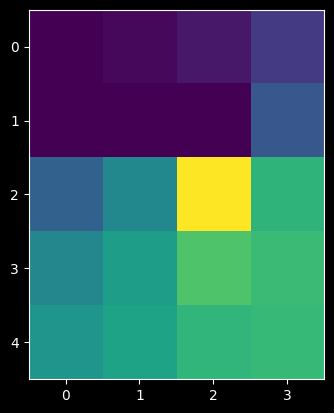

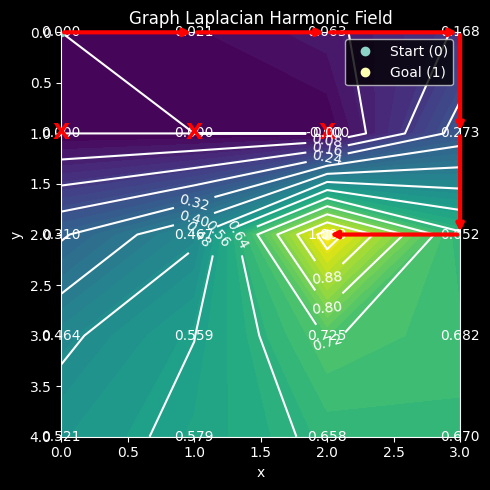

Shortest path found: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2)]
Path length: 6 (Manhattan distance = 4 )


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
N, M = 5, 4
def idx(i, j): return i * M + j

# Start and goal positions
start = (0, 0)
goal  = (2, 2)

s = idx(*start)
g = idx(*goal)

obstacles = [(1,0), (1,1), (1,2)]

# Build the graph Laplacian L
V = N * M
L = np.zeros((V, V))
for i in range(N):
    for j in range(M):
        if (i,j) in obstacles:
            continue
        u = idx(i, j)
        neighbors = 0
        for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
            ni, nj = i + di, j + dj
            if 0 <= ni < N and 0 <= nj < M:
                v = idx(ni, nj)
                L[u, v] = -1
                neighbors += 1
        L[u, u] = neighbors

L_fix = L.copy().astype(float)
b = np.zeros(V)

L_fix[s] = 0; L_fix[s, s] = 1; b[s] = 0.0
L_fix[g] = 0; L_fix[g, g] = 1; b[g] = 1.0

for oi, oj in obstacles:
    u = idx(oi, oj)
    L_fix[u] = 0
    L_fix[u, u] = 1
    # b[u] = 0.5

phi = np.linalg.solve(L_fix, b).reshape(N, M)

# print(L)
plt.imshow(phi)

# Extract one shortest path by steepest ascent (greedy on potential)
path = [start]
current = start
while current != goal:
    i, j = current
    # Find neighbor goood man
    neighbors = [(i+di, j+dj)
                 for di, dj in [(-1,0),(1,0),(0,-1),(0,1)]
                 if 0 <= i+di < N and 0 <= j+dj < M]
    current = max(neighbors, key=lambda p: phi[p[0], p[1]])
    path.append(current)

# Contour map visualization
plt.figure(figsize=(5,5))

# Grid centers for nice square cells
X, Y = np.meshgrid(np.arange(M), np.arange(N))

# Filled contours + white contour lines
plt.contourf(X, Y, phi, levels=40, cmap='viridis')
contour_lines = plt.contour(X, Y, phi, colors='white', levels=15)
plt.clabel(contour_lines, inline=True, fmt='%.2f')

# plt.contourf(X+0.5, Y+0.5, phi, levels=40, cmap='viridis', alpha=0.9)
# cs = plt.contour(X+0.5, Y+0.5, phi, levels=15, colors='white', linewidths=1.2, alpha=0.7)
# plt.clabel(cs, inline=True, fontsize=9, fmt='%.2f')

# Show exact values at each grid point
for i in range(N):
    for j in range(M):
        plt.text(j, i, f'{phi[i,j]:.3f}',
                 ha='center', va='center')

for oi, oj in obstacles:
    plt.text(oj, oi, 'X', ha='center', va='center',
             color='red', fontsize=16, fontweight='bold')
    # plt.gca().add_patch(plt.Rectangle((oj, oi), 1, 1, fill=True, color='black', alpha=0.7))

# Draw the shortest path with arrows
for a, b in zip(path[:-1], path[1:]):
    plt.annotate('', xy=(b[1], b[0]), xytext=(a[1], a[0]),
                 arrowprops=dict(arrowstyle='->', lw=3, color='red'))

# Start and goal markers
plt.plot(start[1], start[0], 'o', label='Start (0)')
plt.plot(goal[1],  goal[0],  'o', label='Goal (1)')

plt.title('Graph Laplacian Harmonic Field')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.axis('equal')
# plt.grid(True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Shortest path found:", path)
print("Path length:", len(path)-1, "(Manhattan distance =", abs(goal[0]-start[0]) + abs(goal[1]-start[1]), ")")

Least squares residual: 0.00e+00
Matrix rank: 25 / 25


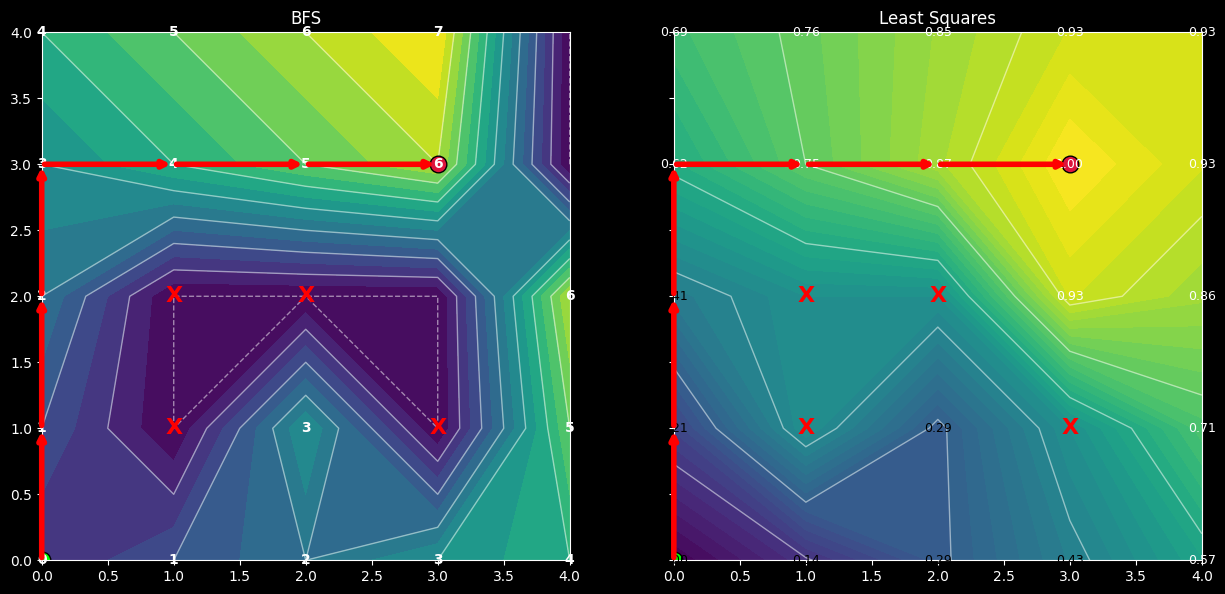


BFS path length     : 6
Least Squares path length : 6
BFS path     : [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]
Least Squares path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]
Paths match? : True


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# ==========================
# Grid settings
# ==========================
N, M = 5, 5                          # 5 rows x 4 columns
start = (0, 0)
goal  = (3, 3)

# Obstacles — change this list freely!
obstacles = [(1,1), (2,1), (2,2), (1,3)]   # complex wall
# obstacles = []                          # no obstacles

def idx(i, j):
    return i * M + j

V = N * M

# ==========================
# 1. Classic BFS (ground truth)
# ==========================
def bfs_path():
    dist = np.full((N, M), -1)
    parent = {}
    q = deque([start])
    dist[start] = 0

    while q:
        i, j = q.popleft()
        if (i, j) == goal:
            break
        for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
            ni, nj = i + di, j + dj
            if (0 <= ni < N and 0 <= nj < M and
                (ni, nj) not in obstacles and
                dist[ni, nj] == -1):
                dist[ni, nj] = dist[i, j] + 1
                parent[(ni, nj)] = (i, j)
                q.append((ni, nj))

    # Reconstruct path
    if dist[goal] == -1:
        return dist, []
    path = []
    cur = goal
    while cur != start:
        path.append(cur)
        cur = parent[cur]
    path.append(start)
    path.reverse()
    return dist, path

dist_bfs, path_bfs = bfs_path()

# ==========================
# 2. Laplacian solved with LEAST SQUARES
# ==========================
L = np.zeros((V, V))

for i in range(N):
    for j in range(M):
        if (i, j) in obstacles:
            continue
        u = idx(i, j)
        deg = 0
        for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
            ni, nj = i + di, j + dj
            if 0 <= ni < N and 0 <= nj < M and (ni, nj) not in obstacles:
                v = idx(ni, nj)
                L[u, v] = -1
                deg += 1
        L[u, u] = deg

# Pin start = 0, goal = 1 using identity rows (Dirichlet boundary)
L_ls = L.copy().astype(float)
b_ls = np.zeros(V)

# Pin start and goal
L_ls[idx(*start)] = 0
L_ls[idx(*start), idx(*start)] = 1
b_ls[idx(*start)] = 0

L_ls[idx(*goal)] = 0
L_ls[idx(*goal), idx(*goal)] = 1
b_ls[idx(*goal)] = 1

# Optional: fix obstacles to constant value (helps stability)
for oi, oj in obstacles:
    u = idx(oi, oj)
    L_ls[u] = 0
    L_ls[u, u] = 1
    b_ls[u] = 0.5

# Solve using LEAST SQUARES instead of solve
phi_flat, residuals, rank, s = np.linalg.lstsq(L_ls, b_ls, rcond=None)
phi = phi_flat.reshape(N, M)

print(f"Least squares residual: {residuals.sum() if residuals.size > 0 else 0:.2e}")
print(f"Matrix rank: {rank} / {V}")

# ==========================
# 3. Extract path using steepest ascent on phi
# ==========================
path_ls = [start]
current = start
visited = set([start])
steps = 0
max_steps = 100

while current != goal and steps < max_steps:
    steps += 1
    i, j = current
    candidates = []
    for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
        ni, nj = i + di, j + dj
        if (0 <= ni < N and 0 <= nj < M and
            (ni, nj) not in obstacles and
            (ni, nj) not in visited):
            candidates.append((ni, nj))
    
    if not candidates:
        break
    
    # Move to highest potential
    next_pos = max(candidates, key=lambda p: phi[p])
    if phi[next_pos] <= phi[current] + 1e-10:
        break  # no improvement → stop
    path_ls.append(next_pos)
    current = next_pos
    visited.add(current)

# ==========================
# 4. Visualization: BFS vs Least-Squares Laplacian
# ==========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

X, Y = np.meshgrid(np.arange(M), np.arange(N))

# Left: BFS
ax1.contourf(X, Y, dist_bfs, levels=15, cmap='viridis')
ax1.contour(X, Y, dist_bfs, colors='white', alpha=0.5, linewidths=1)
for i in range(N):
    for j in range(M):
        if dist_bfs[i,j] >= 0:
            ax1.text(j, i, str(int(dist_bfs[i,j])), ha='center', va='center',
                     color='white', fontsize=10, weight='bold')
for o in obstacles:
    ax1.text(o[1], o[0], 'X', color='red', ha='center', va='center', fontsize=16, weight='bold')
for a, b in zip(path_bfs[:-1], path_bfs[1:]):
    ax1.annotate('', xy=(b[1], b[0]), xytext=(a[1], a[0]),
                 arrowprops=dict(arrowstyle='->', lw=4, color='red'))
ax1.plot(start[1], start[0], 'o', markersize=12, markerfacecolor='lime', markeredgecolor='k')
ax1.plot(goal[1], goal[0], 'o', markersize=12, markerfacecolor='crimson', markeredgecolor='k')
ax1.set_title('BFS')
ax1.invert_yaxis()
ax1.set_aspect('equal')

# Right: Least Squares Laplacian
im = ax2.contourf(X, Y, phi, levels=40, cmap='viridis')
ax2.contour(X, Y, phi, colors='white', alpha=0.5, linewidths=1)
for i in range(N):
    for j in range(M):
        if (i,j) not in obstacles:
            ax2.text(j, i, f'{phi[i,j]:.2f}', ha='center', va='center',
                     color='white' if phi[i,j]>0.5 else 'black', fontsize=9)
for o in obstacles:
    ax2.text(o[1], o[0], 'X', color='red', ha='center', va='center', fontsize=16, weight='bold')
for a, b in zip(path_ls[:-1], path_ls[1:]):
    ax2.annotate('', xy=(b[1], b[0]), xytext=(a[1], a[0]),
                 arrowprops=dict(arrowstyle='->', lw=4, color='red'))
ax2.plot(start[1], start[0], 'o', markersize=12, markerfacecolor='lime', markeredgecolor='k')
ax2.plot(goal[1], goal[0], 'o', markersize=12, markerfacecolor='crimson', markeredgecolor='k')
ax2.set_title('Least Squares')
ax2.invert_yaxis()
ax2.set_aspect('equal')

# plt.suptitle('Path finding', fontsize=18)
plt.tight_layout()
plt.show()

# Print results
print(f"\nBFS path length     : {len(path_bfs)-1}")
print(f"Least Squares path length : {len(path_ls)-1}")
print(f"BFS path     : {path_bfs}")
print(f"Least Squares path: {path_ls}")
print(f"Paths match? : {path_bfs == path_ls}")